In [1]:
import pandas as pd
import os,shutil,math,scipy,cv2
import numpy as np
import matplotlib.pyplot as plt
import random as rn
import tensorflow as tf

from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,roc_curve,auc

from PIL import Image
from PIL import Image as pil_image
from PIL import ImageDraw

from time import time
from glob import glob
from tqdm import tqdm
from skimage.io import imread
from IPython.display import SVG

from scipy import misc,ndimage
from scipy.ndimage.interpolation import zoom
from imageio import imread


In [2]:

from keras import backend as K
from keras.utils.np_utils import to_categorical
from keras import layers
from tensorflow.keras.preprocessing.image import save_img
from keras.utils.vis_utils import model_to_dot
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Flatten,Dropout,Concatenate,GlobalAveragePooling2D,Lambda,ZeroPadding2D
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,SGD
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler


Using TensorFlow backend.


In [3]:

def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["acc"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_acc"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [4]:
def label_assignment(img,label):
    return label

def training_data(label,data_dir):
    for img in tqdm(os.listdir(data_dir)):
        label = label_assignment(img,label)
        path = os.path.join(data_dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(imgsize,imgsize))
        
        X.append(np.array(img))
        Z.append(str(label))

In [5]:
aparagus='images/APARAGUS'
# apple='images/APPLE'
aubergine='images/AUBERGINE'
avocado='images/AVOCADO'
banana='images/BANANA'
beans='images/BEANS'
browncapmushroom='images/BROWN-CAP-MUSHROOM'
cabbage='images/CABBAGE'
cake='images/CAKE'
candy='images/CANDY'
carrots='images/CARROTS'
cereal='images/CEREAL'
chips='images/CHIPS'
chocolate='images/CHOCOLATE'
coffee='images/COFFEE'
corn='images/CORN'
cucumber='images/CUCUMBER'
fish='images/FISH'
flour='images/FLOUR'
garlic='images/GARLIC'
ginger='images/GINGER'
honey='images/HONEY'
jam='images/JAM'
juice='images/JUICE'
kiwi='images/KIWI'
leek='images/LEEK'
lemon='images/LEMON'
lime='images/LIME'
mango='images/MANGO'
melon='images/MELON'
milk='images/MILK'
netarine='images/NETARINE'
nuts='images/NUTS'
oil='images/OIL'
onion='images/ONION'
orange='images/ORANGE'
papaya='images/PAPAYA'
passionfruit='images/PASSION-FRUIT'
pasta='images/PASTA'
peach='images/PEACH'
pear='images/PEAR'
pepper='images/PEPPER'
pineapple='images/PINEAPPLE'
plum='images/PLUM'
pomegranate='images/POMEGRANATE'
potato='images/POTATO'
redbeet='images/RED-BEET'
redgrapefruit='images/RED-GRAPEFRUIT'
rice='images/RICE'
satsumas='images/SATSUMAS'
soda='images/SODA'
spices='images/SPICES'
sugar='images/SUGAR'
tea='images/TEA'
tomato='images/TOMATO'
tomato_sauce='images/TOMATO_SAUCE'
vinegar='images/VINEGAR'
water='images/WATER'
zucchini='images/ZUCCHINI'



X = []
Z = []
imgsize = 300


training_data('aparagus',aparagus)
# training_data('apple',apple)
training_data('aubergine',aubergine)
training_data('avocado',avocado)
training_data('banana',banana)
training_data('beans',beans)
training_data('browncapmushroom',browncapmushroom)
training_data('cabbage',cabbage)
training_data('cake',cake)
training_data('candy',candy)
training_data('carrots',carrots)
training_data('cereal',cereal)
training_data('chips',chips)
training_data('chocolate',chocolate)
training_data('coffee',coffee)
training_data('corn',corn)
training_data('cucumber',cucumber)
training_data('fish',fish)
training_data('flour',flour)
training_data('garlic',garlic)
training_data('ginger',ginger)
training_data('honey',honey)
training_data('jam',jam)
training_data('juice',juice)
training_data('kiwi',kiwi)
training_data('leek',leek)
training_data('lemon',lemon)
training_data('lime',lime)
training_data('mango',mango)
training_data('melon',melon)
training_data('milk',milk)
training_data('netarine',netarine)
training_data('nuts',nuts)
training_data('oil',oil)
training_data('onion',onion)
training_data('orange',orange)
training_data('papaya',papaya)
training_data('passionfruit',passionfruit)
training_data('pasta',pasta)
training_data('peach',peach)
training_data('pear',pear)
training_data('pepper',pepper)
training_data('pineapple',pineapple)
training_data('plum',plum)
training_data('pomegranate',pomegranate)
training_data('potato',potato)
training_data('redbeet',redbeet)
training_data('redgrapefruit',redgrapefruit)
training_data('rice',rice)
training_data('satsumas',satsumas)
training_data('soda',soda)
training_data('spices',spices)
training_data('sugar',sugar)
training_data('tea',tea)
training_data('tomato',tomato)
training_data('tomato_sauce',tomato_sauce)
training_data('vinegar',vinegar)
training_data('water',water)
training_data('zucchini',zucchini)


100%|█████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 423.66it/s]


In [6]:
label_encoder= LabelEncoder()
Y = label_encoder.fit_transform(Z)
Y = to_categorical(Y,60)
X = np.array(X)
X=X/255

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [7]:
augs_gen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2, 
        horizontal_flip=True,  
        vertical_flip=False) 

augs_gen.fit(x_train)

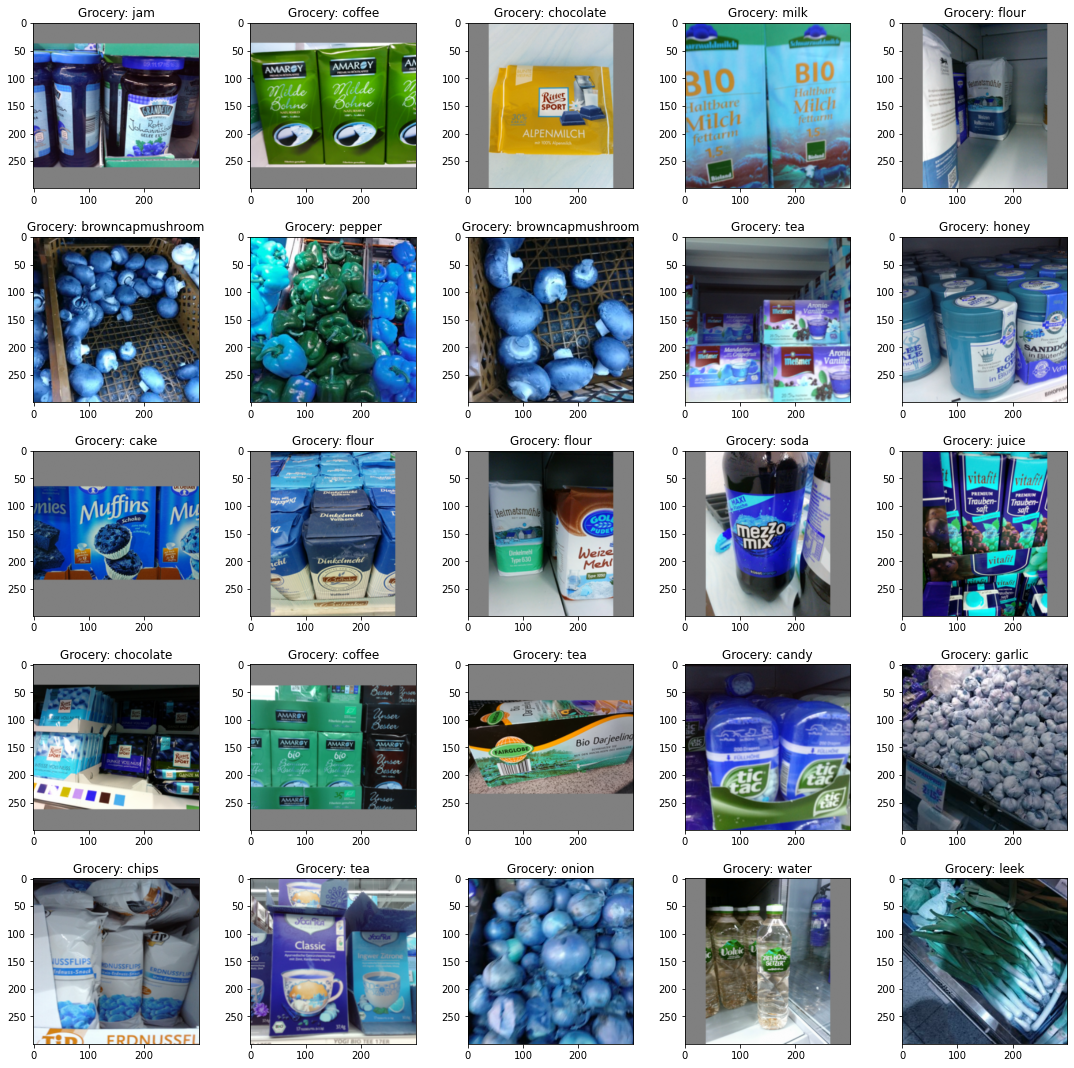

In [8]:
fig,ax=plt.subplots(5,5)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Grocery: '+Z[l])
        
plt.tight_layout()

In [9]:
base_model = VGG16(include_top=False,
                  input_shape = (imgsize,imgsize,3),
                  weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    
for layer in base_model.layers:
    print(layer,layer.trainable)

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.3))
model.add(Dense(25,activation='softmax'))
model.summary()

SVG(model_to_dot(model).create(prog='dot', format='svg'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

<keras.engine.input_layer.InputLayer object at 0x000001E493B19708> False
<keras.layers.convolutional.Conv2D object at 0x000001E47AABA1C8> False
<keras.layers.convolutional.Conv2D object at 0x000001E493B19C48> False
<keras.layers.pooling.MaxPooling2D object at 0x000001E493B2D408> False
<keras.layers.convolutional.Conv2D object at 0x000001E493B43A88> False
<keras.layers.convolutional.Conv2D object at 0x000001E493B4A548> False
<keras.layers.pooling.MaxPooling2D object at 0x000001E493B4D388> False
<keras.layers.convolutional.Conv2D object at 0x000001E493B4DF48> False
<keras.layers.convolutional.Conv2D object at 0x000001E4939D0A08> False
<keras.layers.convolutional.Conv2D object at 0x000001E4939D1B88> False
<keras.layers.pooling.MaxPooling2D object at 0x000001E4939D3BC8> False
<keras.layers.convolutional.Conv2D object at 0x000001E4939D5A88> False
<keras.layers.convolutional.Conv2D object at 0x000001E4939DA548> False
<keras.layers.convolutional.Conv2D object at 0x000001E4939DB708> False
<ker

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

In [ ]:
checkpoint = ModelCheckpoint(
    './base.model',
    monitor='val_acc',
    verbose=1,
    save_best_only=True,
    mode='max',
    save_weights_only=False,
    period=1
)
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=30,
    verbose=1,
    mode='auto'
)
tensorboard = TensorBoard(
    log_dir = './logs',
    histogram_freq=0,
    batch_size=16,
    write_graph=True,
    write_grads=True,
    write_images=False,
)

csvlogger = CSVLogger(
    filename= "training_csv.log",
    separator = ",",
    append = False
)
reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1, 
    mode='auto'
)

callbacks = [checkpoint,tensorboard,csvlogger,reduce]

In [ ]:
opt = SGD(lr=1e-4,momentum=0.99)
opt1 = Adam(lr=1e-3)

model.compile(
    loss='categorical_crossentropy',
    optimizer=opt1,
    metrics=['accuracy']
)

history = model.fit_generator(
    augs_gen.flow(x_train,y_train,batch_size=128),
    validation_data  = (x_test,y_test),
    validation_steps = 100,
    steps_per_epoch  = 100,
    epochs = 50, 
    verbose = 1,
    callbacks=callbacks
)

In [ ]:
show_final_history(history)
model.load_weights('./base.model')

model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
    
model.save("model.h5")
print("Weights Saved")